In [11]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b65f418b-63ab-44a1-915c-a19337dc9896',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-01-20T02:37:44.170Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 10678}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [4]:

type(data)

dict

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981248e+07,1.981248e+07,False,NaN,1,NaN,NaN,None,2025-01-20T02:37:00.000Z,101867.733712,8.822743e+10,72.2758,1.201330,-3.056335,8.149984,4.555888,8.202107,50.816918,2.018253e+12,57.2866,2.139222e+12,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
1,1027,Ethereum,ETH,ethereum,9840,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205017e+08,1.205017e+08,True,NaN,2,NaN,NaN,None,2025-01-20T02:37:00.000Z,3256.471849,6.257916e+10,85.0342,1.503421,-2.955334,0.194565,-6.278797,7.159928,23.248102,3.924105e+11,11.1673,3.924105e+11,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,None,2025-01-20T02:37:00.000Z,3.107951,1.720349e+10,46.0382,3.402602,-4.739153,23.777306,35.874073,186.411173,471.343074,1.789075e+11,5.0782,3.107951e+11,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
3,825,Tether USDt,USDT,tether,113656,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.383683e+11,1.414354e+11,True,NaN,4,NaN,NaN,None,2025-01-20T02:37:00.000Z,0.998559,2.712124e+11,86.7277,-0.016221,-0.046943,-0.115757,-0.107696,-0.244576,-0.131548,1.381689e+11,3.9294,1.412317e+11,None,2025-01-20T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-20 03:43:42.752393
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.865982e+08,5.924613e+08,True,NaN,5,NaN,NaN,None,2025-01-20T02:37:00.000Z,241.572737,3.572523e+10,46.4347,-1.813073,-5.880868,29.843242,23.777918,4.304491,44.511967,1.175489e+11,3.3365,1.431225e+11,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
5,1839,BNB,BNB,bnb,2338,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440056e+08,1.440056e+08,False,NaN,6,NaN,NaN,None,2025-01-20T02:37:00.000Z,687.658511,3.059482e+09,36.4985,1.296884,-3.506209,-0.265382,0.426230,15.172700,14.841539,9.902671e+10,2.8108,9.902671e+10,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
6,74,Dogecoin,DOGE,dogecoin,1152,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.476954e+11,1.476954e+11,True,NaN,7,NaN,NaN,None,2025-01-20T02:37:00.000Z,0.363562,1.055095e+10,56.3695,2.893526,-10.501922,8.986465,12.091322,-2.569589,147.977739,5.369646e+10,1.5271,5.369646e+10,None,2025-01-20T02:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 03:43:42.752393
7,3408,USDC,USDC,usd-coin,24919,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.818290e+10,4.818290e+10,False,NaN,8,NaN,NaN,None,2025-01-20T02:37:00.000Z,1.000201,2.900682e+10,41.6794,-0.026943,0.013062,0.021696,0.008880,0.004252,-0.005894,4.819260e+10,1.3679,4.819260e+10,None,2025-01-20T02:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-20 03:43:42.752393
8,2010,Cardano,ADA,cardano,1447,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,

In [20]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'50',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b65f418b-63ab-44a1-915c-a19337dc9896',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df 

    if not os.path.isfile(r'C:\Users\abiod\Desktop\Data Analysis Files\API.csv'):
        df.to_csv(r'C:\Users\abiod\Desktop\Data Analysis Files\API.csv', header='column names')
    else:
        df.to_csv(r'C:\Users\abiod\Desktop\Data Analysis Files\API.csv', mode='a', header=False)

  

In [25]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api runner successfully')
    sleep(10)
exist()

{'status': {'timestamp': '2025-01-20T03:12:18.159Z', 'error_code': 0, 'error_message': None, 'elapsed': 12, 'credit_count': 1, 'notice': None, 'total_count': 10678}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11868, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981251e+07,1.981251e+07,False,NaN,1,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,101502.060639,8.901924e+10,72.5307,0.651442,-3.155358,7.691379,4.325393,7.288825,50.852214,2.011010e+12,57.3306,2.131543e+12,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
1,1027,Ethereum,ETH,ethereum,9840,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205017e+08,1.205017e+08,True,NaN,2,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,3229.762689,6.289932e+10,84.0970,0.348622,-3.679889,-0.933930,-6.975564,5.556982,22.580940,3.891920e+11,11.1212,3.891920e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,3.083589,1.754627e+10,49.4892,3.225496,-5.188744,22.480055,34.709269,182.328266,468.470740,1.775051e+11,5.0604,3.083589e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
3,825,Tether USDt,USDT,tether,113668,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.383683e+11,1.414354e+11,True,NaN,4,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,0.998824,2.731564e+11,87.8319,0.062400,-0.022684,-0.098384,-0.076775,-0.183897,-0.063934,1.382056e+11,3.9377,1.412691e+11,NaN,2025-01-20T03:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-20 04:05:37.641791
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.865968e+08,5.924599e+08,True,NaN,5,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,232.110531,3.586950e+10,48.2897,-4.484270,-8.781805,24.744911,19.275359,-0.036894,39.849553,1.129442e+11,3.2199,1.375162e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
5,1839,BNB,BNB,bnb,2338,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440056e+08,1.440056e+08,False,NaN,6,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,682.890687,3.064900e+09,36.8156,0.909304,-3.928746,-0.797604,-0.070380,13.922138,14.403255,9.834011e+10,2.8035,9.834011e+10,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
6,74,Dogecoin,DOGE,dogecoin,1152,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.476957e+11,1.476957e+11,True,NaN,7,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,0.359312,1.058470e+10,57.2778,2.160692,-11.532013,7.552249,10.463504,-3.687232,148.359962,5.306889e+10,1.5120,5.306889e+10,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:37.641791
7,3408,USDC,USDC,usd-coin,24921,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.819041e+10,4.819041e+10,False,NaN,8,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,1.000144,2.932570e+10,44.5338,0.024848,0.013689,0.039384,0.009655,0.035205,0.035324,4.819737e+10,1.3740,4.819737e+10,NaN,2025-01-20T03:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-20 04:05:37.641791
8,2010,Cardano,ADA,cardano,1448,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.517134e+10,4.4

In [26]:
df10=pd.read_csv(r'C:\Users\abiod\Desktop\Data Analysis Files\API.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.981251e+07,1.981251e+07,False,NaN,1,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,101502.060639,8.901924e+10,72.5307,0.651442,-3.155358,7.691379,4.325393,7.288825,50.852214,2.011010e+12,57.3306,2.131543e+12,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
1,1,1027,Ethereum,ETH,ethereum,9840,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205017e+08,1.205017e+08,True,NaN,2,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,3229.762689,6.289932e+10,84.0970,0.348622,-3.679889,-0.933930,-6.975564,5.556982,22.580940,3.891920e+11,11.1212,3.891920e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
2,2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.756444e+10,9.998664e+10,False,NaN,3,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,3.083589,1.754627e+10,49.4892,3.225496,-5.188744,22.480055,34.709269,182.328266,468.470740,1.775051e+11,5.0604,3.083589e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
3,3,825,Tether USDt,USDT,tether,113668,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.383683e+11,1.414354e+11,True,NaN,4,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,0.998824,2.731564e+11,87.8319,0.062400,-0.022684,-0.098384,-0.076775,-0.183897,-0.063934,1.382056e+11,3.9377,1.412691e+11,NaN,2025-01-20T03:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-20 04:05:24.971750
4,4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.865968e+08,5.924599e+08,True,NaN,5,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,232.110531,3.586950e+10,48.2897,-4.484270,-8.781805,24.744911,19.275359,-0.036894,39.849553,1.129442e+11,3.2199,1.375162e+11,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
5,5,1839,BNB,BNB,bnb,2338,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440056e+08,1.440056e+08,False,NaN,6,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,682.890687,3.064900e+09,36.8156,0.909304,-3.928746,-0.797604,-0.070380,13.922138,14.403255,9.834011e+10,2.8035,9.834011e+10,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
6,6,74,Dogecoin,DOGE,dogecoin,1152,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.476957e+11,1.476957e+11,True,NaN,7,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,0.359312,1.058470e+10,57.2778,2.160692,-11.532013,7.552249,10.463504,-3.687232,148.359962,5.306889e+10,1.5120,5.306889e+10,NaN,2025-01-20T03:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:05:24.971750
7,7,3408,USDC,USDC,usd-coin,24921,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.819041e+10,4.819041e+10,False,NaN,8,NaN,NaN,NaN,2025-01-20T03:03:00.000Z,1.000144,2.932570e+10,44.5338,0.024848,0.013689,0.039384,0.009655,0.035205,0.035324,4.819737e+10,1.3740,4.819737e+10,NaN,2025-01-20T03:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-20 04:05:24.971750
8,8,2010,Cardano,ADA,cardano,1448,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",

In [27]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [28]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11868,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19812509.00000,19812509.00000,False,NaN,1,NaN,NaN,NaN,2025-01-20T03:11:00.000Z,101828.39599,89232149620.34860,72.63070,0.95524,-2.58618,8.20825,4.65058,7.29435,51.12001,2017476011967.33911,57.62480,2138396315747.50000,NaN,2025-01-20T03:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
1,1027,Ethereum,ETH,ethereum,9840,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120501725.21191,120501725.21191,True,NaN,2,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,3238.17245,62938872922.17669,85.53870,0.46464,-3.23565,-0.62781,-6.57122,5.47744,22.64360,390205367164.73462,11.11260,390205367164.72998,NaN,2025-01-20T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
2,52,XRP,XRP,xrp,1509,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57564441898.00000,99986637553.00000,False,NaN,3,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,3.08695,17630193743.31959,50.25240,2.10440,-5.11332,22.63551,35.53702,180.35175,468.63013,177698487243.58569,5.05750,308694884175.98999,NaN,2025-01-20T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
3,825,Tether USDt,USDT,tether,113669,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,138368309376.05222,141435444705.82135,True,NaN,4,NaN,NaN,NaN,2025-01-20T03:11:00.000Z,0.99879,273674245998.85178,88.24310,0.05313,-0.07652,-0.07302,-0.07836,-0.21084,-0.09541,138201158698.41678,3.93300,141264588889.70001,NaN,2025-01-20T03:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-20 04:12:48.336130
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486595323.06727,592458462.38531,True,NaN,5,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,234.56234,36144627185.08448,50.15800,-4.87981,-7.33974,26.15408,20.85727,0.14486,41.34489,114136937652.47766,3.24850,138968443339.53000,NaN,2025-01-20T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
5,1839,BNB,BNB,bnb,2338,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144005643.92000,144005643.92000,False,NaN,6,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,683.09871,3068709387.00536,36.86370,0.31843,-3.89393,-0.76774,0.17025,13.55274,14.22611,98370069138.11963,2.79970,98370069138.12000,NaN,2025-01-20T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
6,74,Dogecoin,DOGE,dogecoin,1152,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147695976383.70523,147695976383.70523,True,NaN,7,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,0.36001,10602421563.90405,57.58850,0.88775,-11.12010,7.76832,11.00609,-4.49694,147.73074,53172510796.17895,1.51320,53172510796.18000,NaN,2025-01-20T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-20 04:12:48.336130
7,3408,USDC,USDC,usd-coin,24921,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,48191609507.03326,48191609507.03326,False,NaN,8,NaN,NaN,NaN,2025-01-20T03:12:00.000Z,0.99997,29453637392.56026,48.22690,-0.01936,0.00170,-0.00506,0.00344,-0.00579,0.01566,48190248812.79673,1.37160,48190248812.80000,NaN,2025-01-20T03:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0c

In [31]:
df3=df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [32]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.95524,-2.58618,8.20825,4.65058,7.29435,51.12001
Ethereum,0.46464,-3.23565,-0.62781,-6.57122,5.47744,22.64360
XRP,2.10440,-5.11332,22.63551,35.53702,180.35175,468.63013
Tether USDt,0.05313,-0.07652,-0.07302,-0.07836,-0.21084,-0.09541
Solana,-4.87981,-7.33974,26.15408,20.85727,0.14486,41.34489
BNB,0.31843,-3.89393,-0.76774,0.17025,13.55274,14.22611
Dogecoin,0.88775,-11.12010,7.76832,11.00609,-4.49694,147.73074
USDC,-0.01936,0.00170,-0.00506,0.00344,-0.00579,0.01566
Cardano,0.17122,-10.68647,4.04988,5.05053,27.79491,172.88887


In [33]:
df4=df3.stack()
df4

name                                                               
Bitcoin                                quote.USD.percent_change_1h      0.95524
                                       quote.USD.percent_change_24h    -2.58618
                                       quote.USD.percent_change_7d      8.20825
                                       quote.USD.percent_change_30d     4.65058
                                       quote.USD.percent_change_60d     7.29435
                                       quote.USD.percent_change_90d    51.12001
Ethereum                               quote.USD.percent_change_1h      0.46464
                                       quote.USD.percent_change_24h    -3.23565
                                       quote.USD.percent_change_7d     -0.62781
                                       quote.USD.percent_change_30d    -6.57122
                                       quote.USD.percent_change_60d     5.47744
                                       quote.USD.per

In [35]:
type(df3)


pandas.core.frame.DataFrame

In [36]:
type(df4)

pandas.core.series.Series

In [39]:
#convert series to dataframe
df5 = df4.to_frame(name='values')
df5

values
name                                                                        
Bitcoin                               quote.USD.percent_change_1h    0.95524
                                      quote.USD.percent_change_24h  -2.58618
                                      quote.USD.percent_change_7d    8.20825
                                      quote.USD.percent_change_30d   4.65058
                                      quote.USD.percent_change_60d   7.29435
                                      quote.USD.percent_change_90d  51.12001
Ethereum                              quote.USD.percent_change_1h    0.46464
                                      quote.USD.percent_change_24h  -3.23565
                                      quote.USD.percent_change_7d   -0.62781
                                      quote.USD.percent_change_30d  -6.57122
                                      quote.USD.percent_change_60d   5.47744
                                      quote.USD.percent_change_90d  22.64360
XRP                                   quote.USD.percent_change_1h    2.10440
                                      quote.USD.percent_change_24h  -5.11332
                                      quote.USD.percent_change_7d   22.63551
                                      quote.USD.percent_change_30d  35.53702
                                      quote.USD.percent_change_60d 180.35175
                                      quote.USD.percent_change_90d 468.63013
Tether USDt                           quote.USD.percent_change_1h    0.05313
                                      quote.USD.percent_change_24h  -0.07652
                                      quote.USD.percent_change_7d   -0.07302
                                      quote.USD.percent_change_30d  -0.07836
                                      quote.USD.percent_change_60d  -0.21084
                                      quote.USD.percent_change_90d  -0.09541
Solana                                quote.USD.percent_change_1h   -4.87981
                                      quote.USD.percent_change_24h  -7.33974
                                      quote.USD.percent_change_7d   26.15408
                                      quote.USD.percent_change_30d  20.85727
                                      quote.USD.percent_change_60d   0.14486
                                      quote.USD.percent_change_90d  41.34489
BNB                                   quote.USD.percent_change_1h    0.31843
                                      quote.USD.percent_change_24h  -3.89393
                                      quote.USD.percent_change_7d   -0.76774
                                      quote.USD.percent_change_30d   0.17025
                                      quote.USD.percent_change_60d  13.55274
                                      quote.USD.percent_change_90d  14.22611
Dogecoin                              quote.USD.percent_change_1h    0.88775
                                      quote.USD.percent_change_24h -11.12010
                                      quote.USD.percent_change_7d    7.76832
                                      quote.USD.percent_change_30d  11.00609
                                      quote.USD.percent_change_60d  -4.49694
                                      quote.USD.percent_change_90d 147.73074
USDC                                  quote.USD.percent_change_1h   -0.01936
                                      quote.USD.percent_change_24h   0.00170
                                      quote.USD.percent_change_7d   -0.00506
                                      quote.USD.percent_change_30d   0.00344
                                      quote.USD.percent_change_60d  -0.00579
                                      quote.USD.percent_change_90d   0.01566
Cardano                               quote.USD.percent_change_1h    0.17122
                                      quote.USD.percent_change_24h -10.68647
                                      quote.USD.percent_change_7d 

In [40]:
type(df5)

pandas.core.frame.DataFrame

In [41]:
df5.count()

values    300
dtype: int64

In [46]:
index=pd.Index(range(300))
#df6=df5.set_index(index)
df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.95524
1,Bitcoin,quote.USD.percent_change_24h,-2.58618
2,Bitcoin,quote.USD.percent_change_7d,8.20825
3,Bitcoin,quote.USD.percent_change_30d,4.65058
4,Bitcoin,quote.USD.percent_change_60d,7.29435
5,Bitcoin,quote.USD.percent_change_90d,51.12001
6,Ethereum,quote.USD.percent_change_1h,0.46464
7,Ethereum,quote.USD.percent_change_24h,-3.23565
8,Ethereum,quote.USD.percent_change_7d,-0.62781
9,Ethereum,quote.USD.percent_change_30d,-6.57122


In [81]:

df7['percentage_change'] = df7['percentage_change'].replace(['1hour'], ['1h'])
df7['percentage_change'] = df7['percentage_change'].replace(['24hour'], ['24h'])
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_7d'], ['7d'])
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_30d'], ['30d'])
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_60d'], ['60d'])
df7['percentage_change'] = df7['percentage_change'].replace(['quote.USD.percent_change_90d'], ['90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,0.95524
1,Bitcoin,24h,-2.58618
2,Bitcoin,7d,8.20825
3,Bitcoin,30d,4.65058
4,Bitcoin,60d,7.29435
5,Bitcoin,90d,51.12001
6,Ethereum,1h,0.46464
7,Ethereum,24h,-3.23565
8,Ethereum,7d,-0.62781
9,Ethereum,30d,-6.57122


In [82]:
#to visualize we need to import
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\abiod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\abiod\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


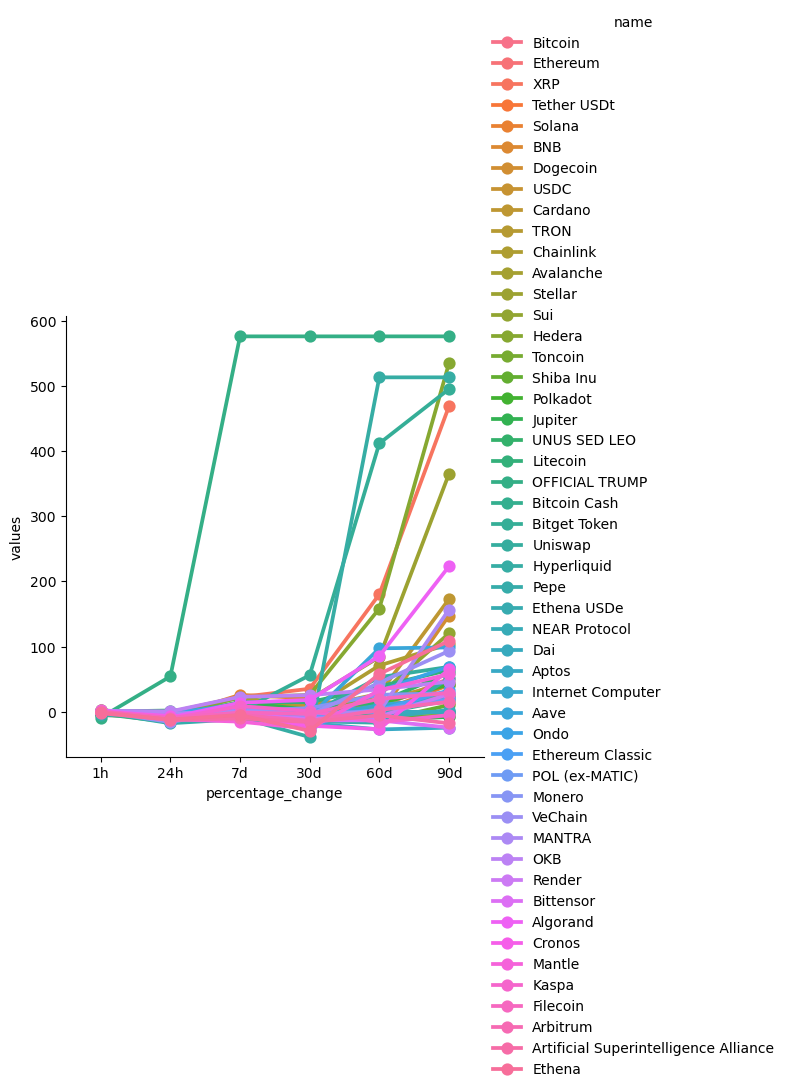

In [83]:
sns.catplot(x='percentage_change',y='values', hue='name', data =df7, kind='point')

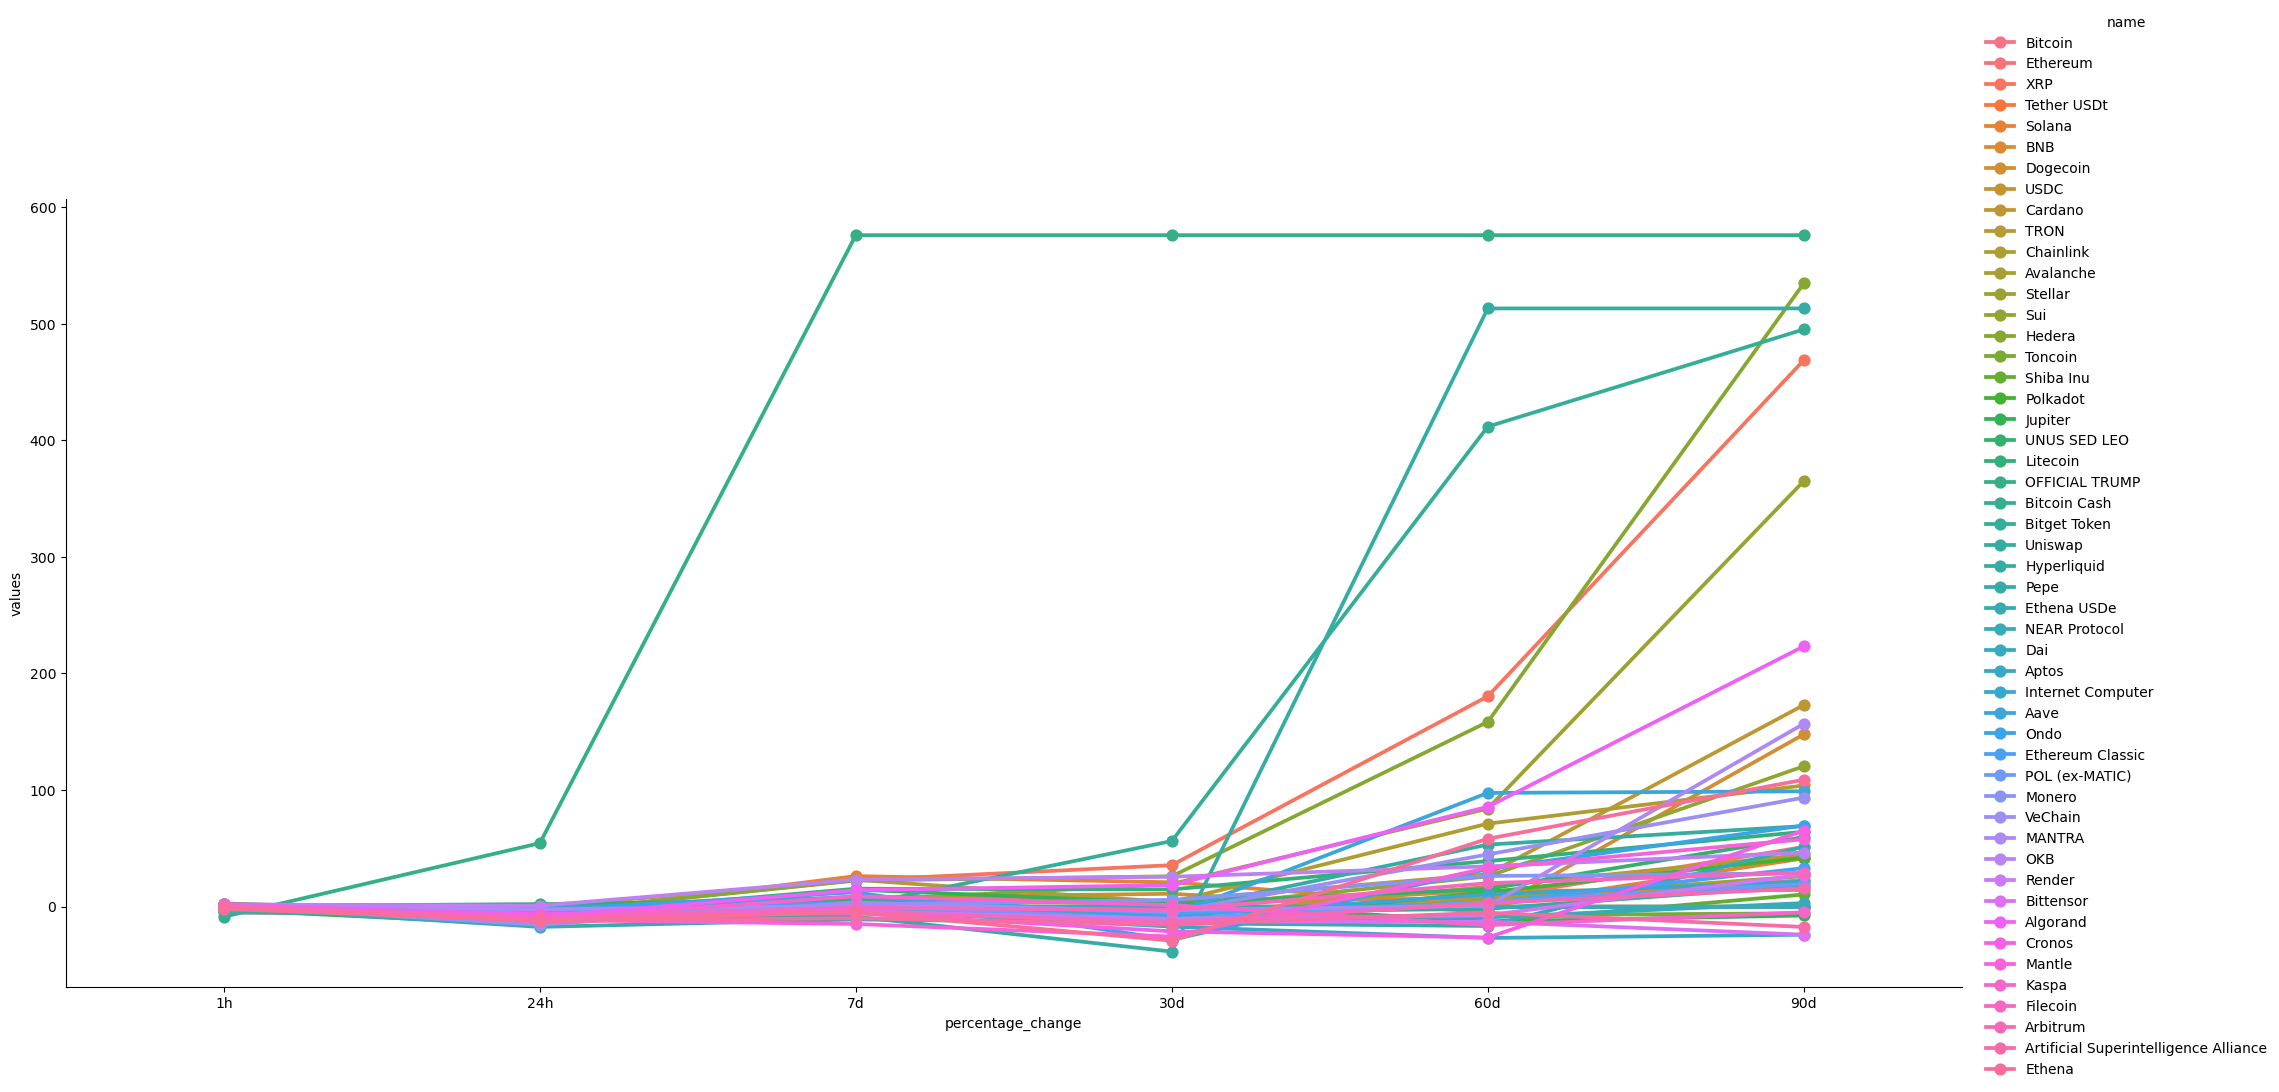

In [84]:
import seaborn as sns

sns.catplot(
    x='percentage_change',
    y='values',
    hue='name',
    data=df7,
    kind='point',
    height=10,  # Set the height of the plot
    aspect=2  # Adjust the aspect ratio to make the plot wider
)


In [59]:
print(df7.columns)


Index(['name', 'percentage_change', 'values'], dtype='object')


In [88]:
df9=df10[['name','quote.USD.price','timestamp']]
df9

,name,quote.USD.price,timestamp
0,Bitcoin,101502.06064,2025-01-20 04:05:24.971750
1,Ethereum,3229.76269,2025-01-20 04:05:24.971750
2,XRP,3.08359,2025-01-20 04:05:24.971750
3,Tether USDt,0.99882,2025-01-20 04:05:24.971750
4,Solana,232.11053,2025-01-20 04:05:24.971750
5,BNB,682.89069,2025-01-20 04:05:24.971750
6,Dogecoin,0.35931,2025-01-20 04:05:24.971750
7,USDC,1.00014,2025-01-20 04:05:24.971750
8,Cardano,0.99290,2025-01-20 04:05:24.971750
9,TRON,0.22761,2025-01-20 04:05:24.971750


In [91]:
df9=df10[['name','quote.USD.price','timestamp',]]
df11=df9.query("name=='Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,101502.06064,2025-01-20 04:05:24.971750
50,Bitcoin,101502.06064,2025-01-20 04:05:37.641791
100,Bitcoin,101715.79233,2025-01-20 04:12:14.746850
150,Bitcoin,101715.79233,2025-01-20 04:12:25.829842
200,Bitcoin,101828.39599,2025-01-20 04:12:36.893085
250,Bitcoin,101828.39599,2025-01-20 04:12:48.336130


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

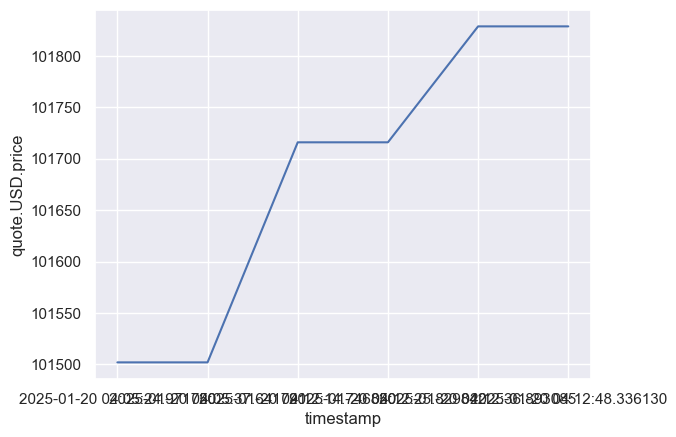

In [95]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp',y='quote.USD.price',data=df11)